In [1]:
import pandas as pd

A = pd.read_json("final.json")
df=pd.DataFrame(A, columns=['rmaxtu','final']) ##columns=[]
A.columns      
df.columns


Index(['rmaxtu', 'final'], dtype='object')

In [2]:
X=df[df.columns[:-1]]
Y=df[df.columns[-1:]]



In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.2)

print(len(X_train),len(X_test))

255 64


In [4]:
from sklearn.linear_model import LinearRegression

funcao_regressao=LinearRegression()

funcao_regressao.fit(X_train,Y_train)




LinearRegression()

In [5]:
funcao_regressao.score(X_train, Y_train)

0.006250243197269301

In [6]:
Previsoes= funcao_regressao.predict(X_test)
import numpy as np
from sklearn import metrics

print('RMSE', np.sqrt(metrics.mean_squared_error(Y_test, Previsoes)))

RMSE 1.633346609505793


In [19]:
print(funcao_regressao.predict([[1.0]]))

[[3.23936452]]


C:\Users\linka\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [10]:
import statsmodels.api as sm

est=sm.OLS(Y,X).fit()
est.params

rmaxtu    4.659851
dtype: float64

In [11]:
est.rsquared_adj

0.4373567319709897

In [12]:
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  final   R-squared (uncentered):                   0.439
Model:                            OLS   Adj. R-squared (uncentered):              0.437
Method:                 Least Squares   F-statistic:                              249.0
Date:                Sat, 05 Feb 2022   Prob (F-statistic):                    7.90e-42
Time:                        23:53:42   Log-Likelihood:                         -787.96
No. Observations:                 319   AIC:                                      1578.
Df Residuals:                     318   BIC:                                      1582.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
rmaxtu         4.6599      0.295     15.779      0.000       4.079       5.241
==============================================================================
Omnibus:                      434.701   Durbin-Watson:                   1.897
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            80419.462
Skew:                           6.251   Prob(JB):                         0.00
Kurtosis:                      79.773   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
est.predict()

array([1.86394053, 2.19013013, 2.32992567, 2.32992567, 0.37278811,
       4.14726768, 0.93197027, 0.93197027, 2.98230485, 1.77074351,
       1.16496283, 0.13979554, 0.37278811, 0.65237919, 1.35135689,
       1.16496283, 2.32992567, 3.07550188, 0.23299257, 3.12210039,
       2.32992567, 3.26189593, 2.56291823, 4.14726768, 0.32618959,
       0.51258365, 1.86394053, 4.00747214, 1.86394053, 0.97856878,
       1.63094797, 0.41938662, 1.77074351, 3.8676766 , 3.77447958,
       0.37278811, 0.83877324, 2.46972121, 3.12210039, 0.41938662,
       4.28706322, 3.1686989 , 3.12210039, 0.27959108, 0.93197027,
       1.53775094, 1.95713756, 3.8676766 , 2.60951674, 1.16496283,
       2.32992567, 4.42685876, 0.32618959, 0.83877324, 2.7959108 ,
       3.54148701, 2.32992567, 0.83877324, 0.13979554, 1.16496283,
       1.07176581, 2.65611526, 4.00747214, 0.37278811, 0.93197027,
       4.00747214, 2.93570634, 1.16496283, 0.97856878, 0.60578067,
       4.1938662 , 2.65611526, 4.38026025, 3.91427512, 0.23299

Text(0, 0.5, 'final')

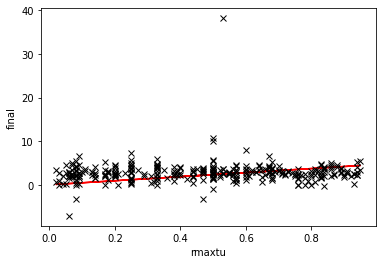

In [15]:

import matplotlib.pyplot as plt
##plt.figure(figsize=(10,10))
##plt.scatter(X_train, Y_train)
##plt.plot(X_test, funcao_regressao.predict(X_test), color='red')
plt.plot(df['rmaxtu'], est.predict(),'r-', label='predicted' )

plt.plot(df['rmaxtu'], df['final'], 'kx', label='data'  )
plt.xlabel('rmaxtu')
plt.ylabel('final')